In [ ]:
import time
from selenium import webdriver
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
MAX_PAGE_NUM = 1      #number of pages 
path=r"/Users/ahmedsaad/Desktop/Data science/geckodriver"  ## you need to setup geckodriver first from 
driver=webdriver.Firefox(executable_path=path)
rate1=[]
number_of_reviwers=[]
publication_year=[]
number_of_pages=[]
for i in range(1, MAX_PAGE_NUM + 1): 
    page_num =  str(i)
    url = "https://www.idefix.com/kategori/Kitap/Bilim/grupno=00052?Page=" + page_num 
    driver.get(url)
    names = driver.find_elements_by_xpath('//a[@class="who"]')
    author=[name.text for name in names]
    prices = driver.find_elements_by_xpath('//span[@class="price price"]')
    books_prices=[re.sub(r'(?is),', '.' , price.text[:-3]) for price in prices]
    books = driver.find_elements_by_xpath('//div[@class="box-title"]')
    books_names=[book.text for book in books ]
    links = driver.find_elements_by_xpath('/html/body/div[1]/section/div/div[2]/div[1]/div[5]/div/div[3]/div[2]/section/div/div/div/div/div/div/div/div[3]/a')
    booksURLs = [elem.get_attribute('href') for elem in  links] # link to get to each book on the website 
    for j in booksURLs:                       
        driver.get(j)
        time.sleep(3)      ## To keep the data from corrupted
        reviwers=driver.find_elements_by_xpath("/html/body/div[1]/section/div/div[2]/section[2]/div[1]/div/div/div[3]/div[2]/div[1]/div[2]/span/span[3]")[0].text
        number_of_reviwers.append(reviwers)
        rate=driver.find_elements_by_xpath("/html/body/div[1]/section/div/div[2]/section[2]/div[1]/div/div/div[3]/div[2]/div[1]/div[2]/span/span[1]")[0].text
        rate1.append(re.sub(r'(?is),', '.' ,rate))
        try:
            publicationYear=driver.find_elements_by_xpath("//li//span[text()='İlk Baskı Yılı:']/following::a[@class='bold' and text()<=2020]")[0]
            publication_year.append(publicationYear.text)
            NotFound="null"
        except:
            publication_year.append(NotFound)

        try:
           pages=driver.find_elements_by_xpath("//li//span[text()='Sayfa Sayısı:']/following::a[@class='bold' and text()<=1500]")[0]
           number_of_pages.append(pages.text)
           Notfound="null"
        except:
            number_of_pages.append(Notfound)
        

In [50]:
#Easiest way to store your data in csv file
scraped_data = pd.DataFrame({'Author': author, 'ItemPrice': books_prices,'Name':books_names,'Rate':rate1,'Reviwers':number_of_reviwers,'First Edition year' : publication_year,"Number of pages" : number_of_pages}) 
scraped_data.to_csv("book_sc.csv",index=False) # give any name to csv file 
pd.read_csv("book_sc.csv") #read csv file 

,Author,ItemPrice,Name,Rate,Reviwers,First Edition year,Number of pages
0,Serkan Karaisma...,34.30,Arachnoid Mater,3.5,19,2020.0,488.0
1,Tristan Gooley,23.40,Doğanın İşaretlerini Okumanın Kaybolmuş Sanatı,4.0,26,2018.0,NaN
2,Sinan Canan,21.00,İFA:İnsanın Fabrika Ayarları 1.Kitap-Beden,3.5,14,2019.0,NaN
3,Stephen Hawking,20.30,Zamanın Kısa Tarihi,4.0,125,2017.0,NaN
4,Serkan Karaisma...,25.20,Beyinde Ararken Bağırsakta Buldum,3.5,57,2017.0,NaN
5,Sinan Canan,21.00,İFA: İnsanın Fabrika Ayarları 2. Kitap-İlişkil...,3.0,4,2020.0,192.0
6,Cem Say,16.06,Yeni Dünya Yeni Ağ,0.0,0,2020.0,208.0
7,David Eagleman,23.40,Incognito - Beynin Gizli Hayatı,4.0,135,2013.0,294.0
8,Ed Yong,23.40,Mikrobiyota,4.0,25,2018.0,NaN
9,Charles Darwin,28.00,Türlerin Kökeni,4.0,31,2017.0,NaN


[[194.07671016  -0.79194444]
 [ -0.79194444   1.10694444]]
Mean:  23.716111111111108
Median:  21.0
stdev:  13.736290999833207


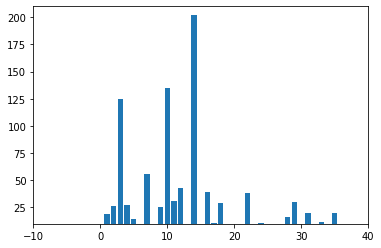

In [28]:
list_1=[]
iteamPrice = list(map(float,books_prices))
Reviwers = list(map(int, number_of_reviwers))  
Rate=list(map(float, rate1))
print( np.cov(iteamPrice, Rate))
for i,j in enumerate(Reviwers):
    list_1.append(i+1)
npiteamPrice=np.array(iteamPrice) 
print("Mean: ",npiteamPrice.mean())
print("Median: ",np.median(npiteamPrice))
print("stdev: ",np.std(npiteamPrice))
plt.bar(list_1,Reviwers)
plt.axis([-10,40,10,210])
plt.show()

In [19]:
a=''.join(books_names)
s=re.findall("[^-]",a)
d=''.join(s)
m=d.split()
q=Counter(m)
print(q,"\n")
inverse = [(value, key) for key, value in q.items()]
print("The most used word in the book names:  ",max(inverse)[1])

Counter({'ve': 3, 'Bir': 3, 'Kısa': 2, 'Gizli': 2, 'Fabrika': 2, 'Ayarları': 2, 'Kitap': 2, 'Arachnoid': 1, 'MaterZamanın': 1, 'TarihiDoğanın': 1, 'İşaretlerini': 1, 'Okumanın': 1, 'Kaybolmuş': 1, 'SanatıBeyinde': 1, 'Ararken': 1, 'Bağırsakta': 1, 'BuldumBitkilerin': 1, 'BildikleriYeni': 1, 'Dünya': 1, 'Yeni': 1, 'AğIncognito': 1, 'Beynin': 1, 'HayatıMikrobiyotaİFA:İnsanın': 1, '1.KitapBedenTürlerin': 1, 'KökeniİFA:': 1, 'İnsanın': 1, '2.': 1, 'Kitapİlişkiler': 1, 'StresBüyük': 1, 'Sorulara': 1, 'YanıtlarPersler': 1, "Anadolu'da": 1, 'Kudret': 1, 'Görkemİnsanın': 1, 'KusurlarıKimsenin': 1, 'Bilemeyeceği': 1, 'ŞeylerTanrı': 1, 'YanılgısıGen': 1, 'BencildirEşyanın': 1, 'TabiatıKara': 1, 'DeliklerEvren': 1, '101Son': 1, 'YıllarımHayvanların': 1, 'Yaşamıİnsanlık': 1, '2.0David': 1, 'Eagleman': 1, 'Seti4': 1, 'TakımDenizdeki': 1, '1001': 1, 'Şeyi': 1, 'BulunEminim': 1, 'Şaka': 1, 'Yapıyorsunuz': 1, 'Bay': 1, 'Feynman': 1, 'Meraklı': 1, 'Şahsiy...Bitki': 1, 'ZekasıDoğa': 1, 'Kitabı:': 1, 'Bi